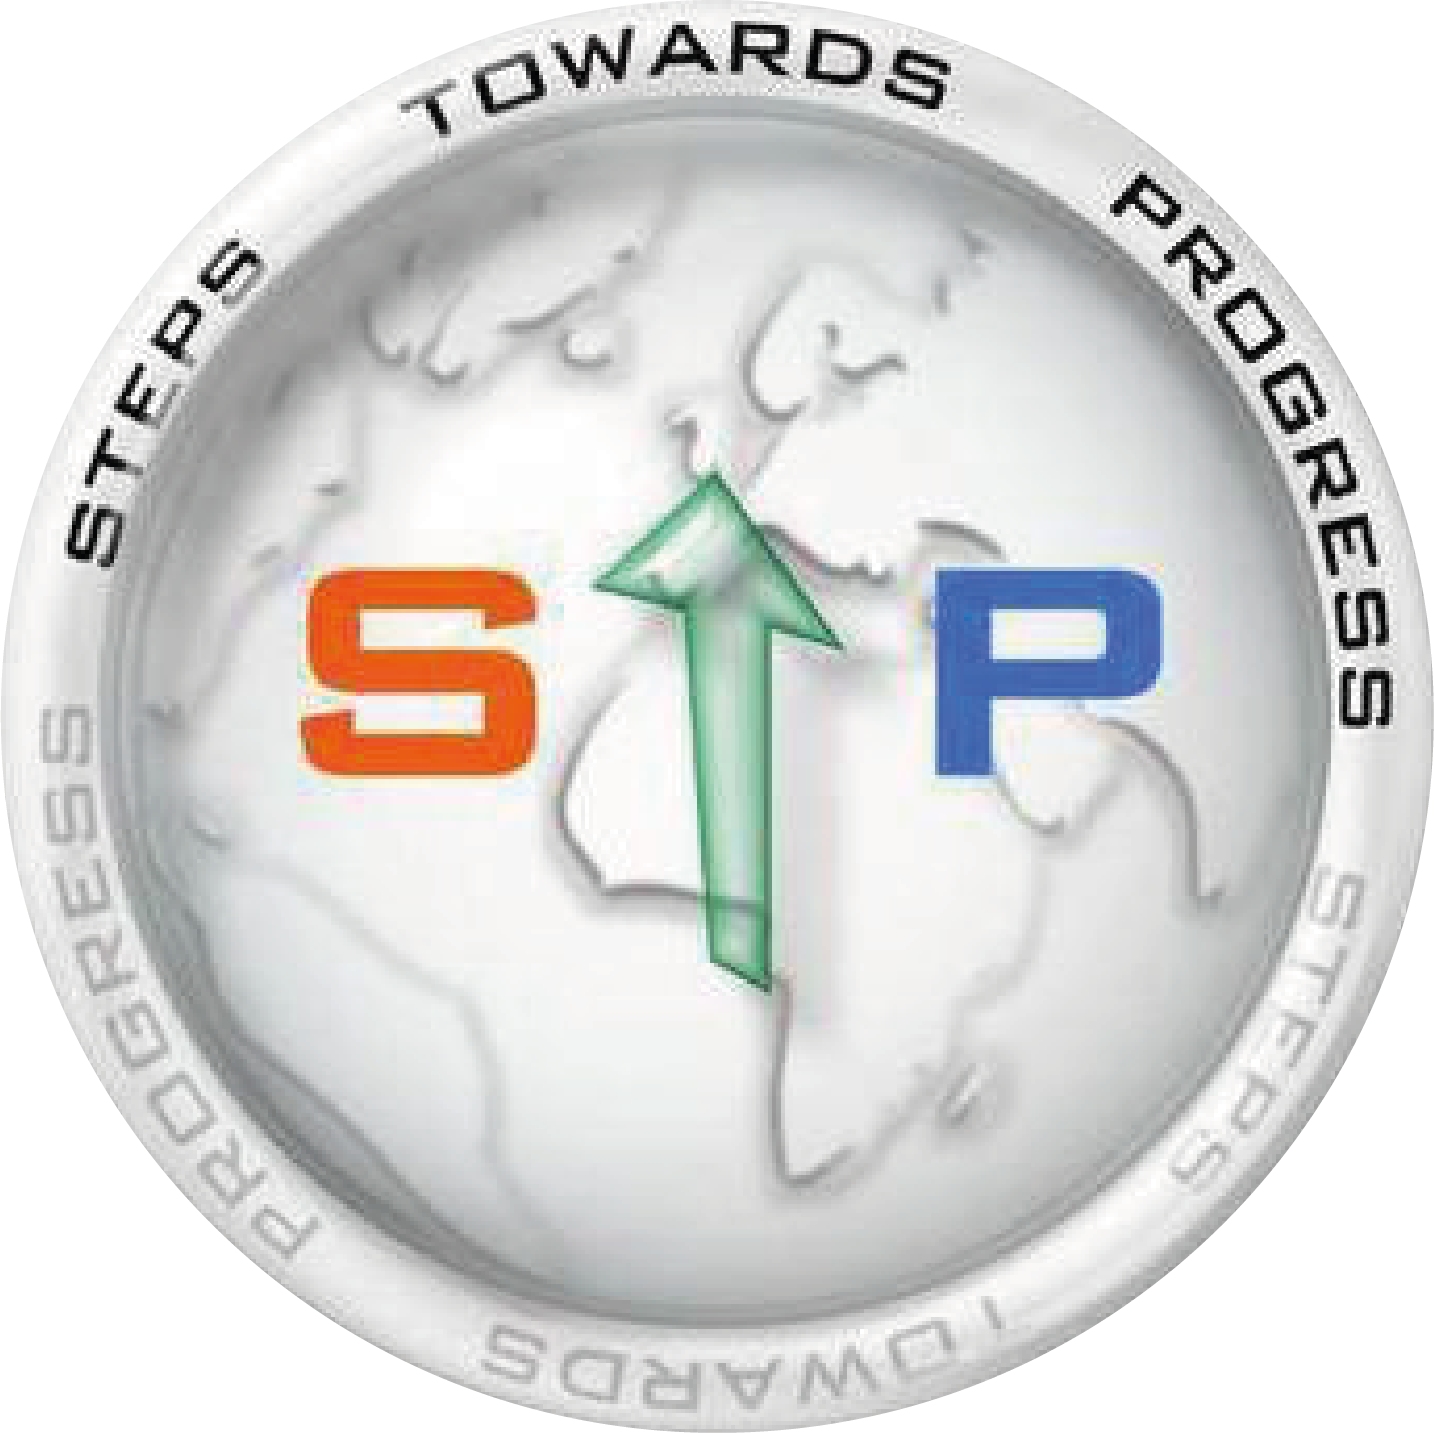

In [1]:
import cv2
import numpy as np
import os
import requests
import torch
def submit(folder_link):
  model_prediction=[]
  '''
  Return:
  model_prediction -> list of zeros and ones based on the prediction for each video in the folder (0 -> not shop lifter | 1-> shop lifter)

  Args:
  folder_link -> link for a folder has some videos to predict

  '''
  # write your code here
  #---------------------------------------------------------------------------------------------------------
  # load your model weights
  # loop on all the videos in the folder_link
  # append the predictions to the list model_prediction

  # Note : the returned predictions should be 0 or 1 (0 -> not shop lifter | 1-> shop lifter)
  
  model_url = 'https://github.com/MohamedAlaaAli/bash/blob/main/mvit.pth?raw=true'
  
  # Specify the height and width to which each video frame will be resized in our dataset.
  IMAGE_HEIGHT , IMAGE_WIDTH = 224, 224

  # Specify the number of frames of a video that will be fed to the model as one sequence.
  SEQUENCE_LENGTH = 16
  

  # model_ = tensorflow.keras.utils.get_file(fname='a4ok.h5', origin=model_url)
  response = requests.get(model_url, allow_redirects=True)
  with open('mvit.pth', 'wb') as file:
    file.write(response.content)

  # Load the checkpoint
  checkpoint = torch.load('mvit.pth')

  # Initialize the model with the saved architecture
  model = checkpoint['model_architecture']

  # Load the model weights
  model.load_state_dict(checkpoint['model_state_dict'])
  # Set the model to evaluation mode
  #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to("cpu")
  model.eval()
  

  def predict_video(video_file_path, SEQUENCE_LENGTH):

      video_reader = cv2.VideoCapture(video_file_path)

      # Get the width and height of the video.
      original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
      original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

      # Declare a list to store video frames we will extract.
      frames_list = []

      # Store the predicted class in the video.
      predicted_class_name = ''

      # Get the number of frames in the video.
      video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

      # Calculate the interval after which frames will be added to the list.
      skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)

      # Iterating the number of times equal to the fixed length of sequence.
      for frame_counter in range(SEQUENCE_LENGTH):

          # Set the current frame position of the video.
          video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

          success, frame = video_reader.read()

          if not success:
              break

          # Resize the Frame to fixed Dimensions.
          resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

          # Normalize the resized frame.
          normalized_frame = resized_frame / 255

          # Appending the pre-processed frame into the frames list
          frames_list.append(normalized_frame)

      # Passing the  pre-processed frames to the model and get the predicted probabilities.
      predicted_labels_probabilities = model(torch.tensor(np.transpose(np.expand_dims(frames_list, axis = 0), (0,4, 1, 2, 3))).float().to("cpu"))

      # Get the index of class with highest probability.
      predicted_label = torch.argmax(predicted_labels_probabilities)

      model_prediction.append(predicted_label.item())
      # Get the class name using the retrieved index.
      #predicted_class_name = CLASSES_LIST[predicted_label]

      video_reader.release()
  # Specifying video to be predicted
  for pth in os.listdir(folder_link):
    input_video_file_path = os.path.join(folder_link, pth)
    print(input_video_file_path)
    # Perform Single Prediction on the Test Video.
    predict_video(input_video_file_path, SEQUENCE_LENGTH)



  #---------------------------------------------------------------------------------------------------------


  return model_prediction

In [3]:
submit("test/shop lifter")

test/shop lifter/shop_lifter_75.mp4
test/shop lifter/shop_lifter_111.mp4
test/shop lifter/shop_lifter_92.mp4
test/shop lifter/shop_lifter_58.mp4
test/shop lifter/shop_lifter_59.mp4
test/shop lifter/shop_lifter_77.mp4
test/shop lifter/shop_lifter_112.mp4
test/shop lifter/shop_lifter_95.mp4
test/shop lifter/shop_lifter_110.mp4
test/shop lifter/shop_lifter_78.mp4
test/shop lifter/shop_lifter_94.mp4
test/shop lifter/shop_lifter_61.mp4
test/shop lifter/shop_lifter_60.mp4
test/shop lifter/shop_lifter_93.mp4
test/shop lifter/shop_lifter_109.mp4
test/shop lifter/shop_lifter_76.mp4


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]